## penguins

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
df = sns.load_dataset('penguins')

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [9]:
df.dropna(inplace=True)

<Axes: >

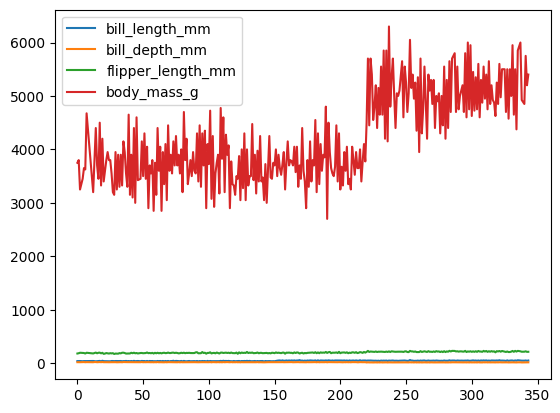

In [10]:
df.plot()

In [11]:
print(df.species.unique())
print(df.island.unique())
print(df.sex.unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female']


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['species'] = label_encoder.fit_transform(dfi['species'])
print(label_encoder.classes_)
dfi['island'] = label_encoder.fit_transform(dfi['island'])
print(label_encoder.classes_)
dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)

['Adelie' 'Chinstrap' 'Gentoo']
['Biscoe' 'Dream' 'Torgersen']
['Female' 'Male']


In [13]:
dfi.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [14]:
y_data = dfi[['species']].values
dfi.drop('species', axis=1, inplace=True)
X_data = dfi.values

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [16]:
class PenguinsModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(PenguinsModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value        

In [17]:
X_data = torch.Tensor(X_data)
y_data = torch.LongTensor(y_data)
y_data = y_data.squeeze()

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [19]:
model = PenguinsModel(6, 3) 

In [20]:
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[0], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[0])

tensor([[ -383.6891, -1269.9373,  -178.3692]])
tensor(-1831.9956)
tensor(2) tensor(2)


In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [22]:
print(model)

PenguinsModel(
  (model): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
)


In [23]:
model = PenguinsModel(6, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 479.4854736328125
epoch 1000th loss: 0.29897651076316833
epoch 2000th loss: 0.7554271817207336
epoch 3000th loss: 0.09992936253547668
epoch 4000th loss: 0.07515861839056015
epoch 5000th loss: 0.0650474801659584
epoch 6000th loss: 0.053985051810741425
epoch 7000th loss: 0.045956630259752274
epoch 8000th loss: 0.04212753102183342
epoch 9000th loss: 0.03749149292707443


In [24]:
n = 99
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[ 96.9425,  95.9195, 105.4722]])
tensor(298.3342)
tensor(2) tensor(2)


In [25]:
model = PenguinsModel(6, 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 10000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 406.7470397949219 test loss: 437.2493591308594
epoch 1000th training loss: 0.37973618507385254 test loss: 0.3610691428184509
epoch 2000th training loss: 0.23162831366062164 test loss: 0.20844422280788422
epoch 3000th training loss: 0.13046100735664368 test loss: 0.11636828631162643
epoch 4000th training loss: 0.08673197031021118 test loss: 0.0715227723121643
epoch 5000th training loss: 0.9528157711029053 test loss: 0.45214977860450745
epoch 6000th training loss: 0.05513230338692665 test loss: 0.04930856078863144
epoch 7000th training loss: 0.045451920479536057 test loss: 0.038298074156045914
epoch 8000th training loss: 0.04497150704264641 test loss: 0.050792694091796875
epoch 9000th training loss: 0.03708083927631378 test loss: 0.0383015051484108


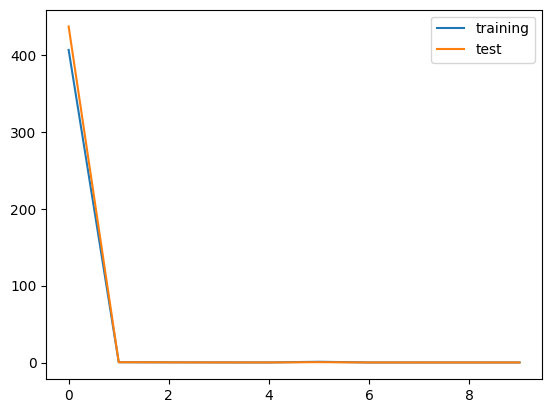

In [26]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.9850746268656716
